In [2]:
import pandas as pd

# CSV load
df = pd.read_csv(r"C:\Users\harsh\python-projects\data-prep-project\data\titanic.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load dataset
df = pd.read_csv(r"C:\Users\harsh\python-projects\data-prep-project\data\titanic.csv")

# 2️⃣ Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])  # too many missing

# 3️⃣ Encode categorical variables
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 4️⃣ Feature engineering (optional but useful)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 5️⃣ Standardize numeric features
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

# 6️⃣ Save cleaned dataset
df.to_csv(r"C:\Users\harsh\python-projects\data-prep-project\outputs\processed_titanic.csv", index=False)

print("✅ Data cleaning complete. File saved in outputs/processed_titanic.csv")
print(df.head())


✅ Data cleaning complete. File saved in outputs/processed_titanic.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                             Heikkinen, Miss. Laina    0 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                           Allen, Mr. William Henry    1  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  FamilySize  
0      0         A/5 21171 -0.502445       False        True           2  
1      0          PC 17599  0.786845       False       False           2  
2      0  STON/O2. 

✅ Dataset loaded
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

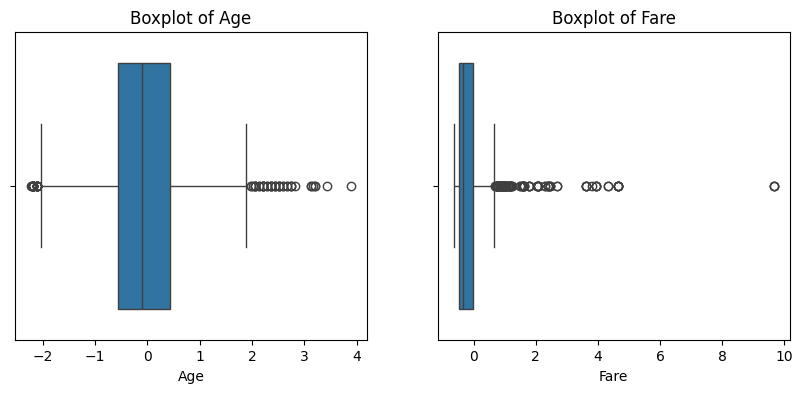

✅ Outliers removed
✅ Final cleaned dataset saved: outputs/processed_titanic.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    0 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1      0   
4                      Allen, Mr. William Henry    1  0.433312      0      0   
5                              Moran, Mr. James    1 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  FamilySize  
0         A/5 21171 -0.502445       False        True           2  
2  STON/O2. 3101282 -0.488854       False        True           1  
3            11380

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load dataset
df = pd.read_csv(r"C:\Users\harsh\python-projects\data-prep-project\data\titanic.csv")
print("✅ Dataset loaded")
print(df.head())
print(df.info())
print(df.isnull().sum())

# 2️⃣ Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])
print("\n✅ Missing values handled")

# 3️⃣ Convert categorical to numerical
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print("✅ Categorical variables encoded")

# 4️⃣ Standardize numerical features
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
print("✅ Numerical features standardized")

# 5️⃣ Visualize outliers
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

# 6️⃣ Remove outliers using IQR
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
df = df[(df['Age'] >= Q1_age - 1.5*IQR_age) & (df['Age'] <= Q3_age + 1.5*IQR_age)]

Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
df = df[(df['Fare'] >= Q1_fare - 1.5*IQR_fare) & (df['Fare'] <= Q3_fare + 1.5*IQR_fare)]
print("✅ Outliers removed")

# 7️⃣ Optional feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 8️⃣ Save cleaned dataset
df.to_csv(r"C:\Users\harsh\python-projects\data-prep-project\outputs\processed_titanic.csv", index=False)
print("✅ Final cleaned dataset saved: outputs/processed_titanic.csv")
print(df.head())

